In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [12]:
cust_df = pd.read_csv("OnlineRetail.csv", encoding='unicode_escape')
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [13]:
cust_df['Country'] = cust_df['Country'].astype('category').cat.codes
df = cust_df[['Quantity', 'UnitPrice', 'Country']]
df.head()

,Quantity,UnitPrice,Country
0,6,2.55,36
1,6,3.39,36
2,8,2.75,36
3,6,3.39,36
4,6,3.39,36


In [14]:
from sklearn.preprocessing import StandardScaler
df = df[(df['Quantity'] >= 0) & (df['Quantity'] <= 1000)]
df = df[(df['UnitPrice'] >= 0) & (df['Quantity'] <= 1000)]
df = StandardScaler().fit_transform(df)
df = pd.DataFrame(df)
df.head()

,0,1,2
0,-0.139047,-0.037614,0.277936
1,-0.139047,-0.014203,0.277936
2,-0.069051,-0.032040,0.277936
3,-0.139047,-0.014203,0.277936
4,-0.139047,-0.014203,0.277936


In [15]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(df)
labels = k_means.labels_
print(labels)

[0 0 0 ... 2 2 2]


In [16]:
df["Clus_km"] = labels
df.head(5)

,0,1,2,Clus_km
0,-0.139047,-0.037614,0.277936,0
1,-0.139047,-0.014203,0.277936,0
2,-0.069051,-0.032040,0.277936,0
3,-0.139047,-0.014203,0.277936,0
4,-0.139047,-0.014203,0.277936,0


In [17]:
df.groupby('Clus_km').mean()

,0,1,2
Clus_km,,,
0,-0.074073,-0.002312,0.259256
1,-0.314038,304.109259,0.277936
2,0.261165,0.011567,-3.613415
3,10.792823,-0.069695,-0.495773


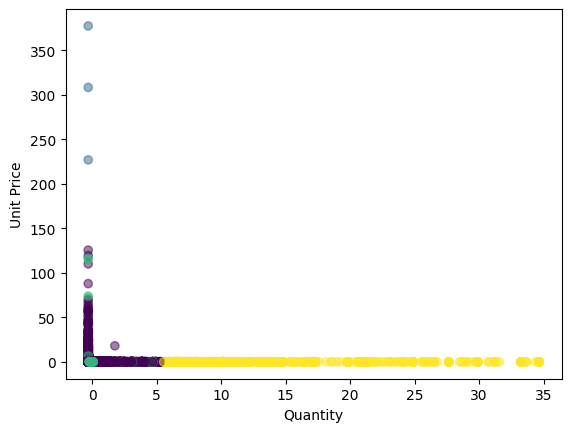

In [19]:
# area = np.pi * (df[1])**2  
plt.scatter(df[0], df[1], c=df['Clus_km'], alpha=0.5)
plt.xlabel('Quantity', fontsize=10)
plt.ylabel('Unit Price', fontsize=10)

plt.show()